<a href="https://colab.research.google.com/github/chetan7116desai/TEAM_A_data606/blob/main/Data_Cleansing/COVID_Datacleaning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Vaccine Efficiency Prediction using machine learning techniques**





>***Understanding VAERS data***



1.   VAERS was formed by the FDA and the CDC to gather reports of vaccine-related adverse events. (From November 1, 1990 to the present)
2.   VAERS is used to continuously monitor reports to see if any vaccination or vaccine lot has a greater rate of incidents than expected
3. Approximately 85-90 percent of vaccination adverse event reports are for very modest occurrences like fevers or redness and edema at the injection site. The remaining reports (less than 15%) are about serious incidents including hospitalizations, life-threatening diseases, or fatalities
4. When multiple reports of a silgle case or event are received, only the first report received is included in the publicly acessible dataset

---







> ***Description of Data Files***


Data sets files can be downloaded from [here](https://vaers.hhs.gov/data/datasets.html)

Data Discription can be found [here](https://vaers.hhs.gov/docs/VAERSDataUseGuide_November2020.pdf)

> ***There are three data files:***

VAERSDATA.CSV

VAERSVAX.CSV

VAERSSYMPTOMS.CSV

There are three data types:

NUM = numeric data

CHAR = text or "character" data

DATE = date fields in mm/dd/yy format





> ***VAERS Data Limitations***



When analyzing VAERS data, keep in mind that no cause-and-effect relationship has been proven for any reported occurrence. VAERS receives reports of all possible links between vaccines and adverse events (possible side effects). As a result, VAERS collects information on any adverse event that occurs after immunization, whether it is coincidental or actually caused by the vaccine. A report of an adverse event to VAERS is not proof that the occurrence was caused by the vaccine.

* VAERS is a passive reporting system, which means that reports of adverse events are not collected automatically and must be reported to VAERS. Anyone, including healthcare providers, patients, and family members, can voluntarily submit VAERS reports. The quality and completeness of reports varies. They frequently lack details and, on sometimes, may provide inaccurate information.

* One of the major drawbacks of passive monitoring systems, such as VAERS, is "underreporting." The phrase "underreporting" refers to the reality that only a tiny percentage of genuine adverse events are reported to VAERS. The extent of underreporting differs greatly. For example, many of the millions of immunizations given by injection each year induce pain, yet only a small percentage of these instances result in a VAERS report. Minor side effects of vaccines often include this type of soreness, as well as low fevers, as physicians and patients are aware. Serious and unexpected medical events, on the other hand, are more likely to be reported than minor ones, especially when they occur soon after immunization, even if they are unrelated to the vaccine.

* A report to VAERS does not always imply that the indicated vaccine(s) were to blame for the adverse event. It merely validates that the alleged occurrence happened after the vaccine was administered. VAERS will accept the report without requiring confirmation that the occurrence was caused by the immunization. VAERS accepts all reports without determining if the vaccine was to blame.

In [ ]:
# Connecting to shared drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action='ignore')
import re
import numpy as np

## Data Process

### Understaing VAERS Vaccination data

In [ ]:
df_vax = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_vax.csv")

In [ ]:
df_vax.drop('Unnamed: 0',axis=1,inplace=True)
df_vax.head()


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,27274,HIBV,PFIZER\WYETH,M030FC,1,IM,NaN,HIB (HIBTITER)
1,27275,FLU3,PARKE-DAVIS,01870P,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUOGEN)
2,27276,DTP,LEDERLE LABORATORIES,0B21173,3,IM L,NaN,DTP (TRI-IMMUNOL)
3,27276,OPV,PFIZER\WYETH,NaN,3,PO,MO,"POLIO VIRUS, ORAL (ORIMUNE)"
4,27277,RAB,PASTEUR MERIEUX INST.,D1186,2,NaN,LA,RABIES (IMOVAX ID)


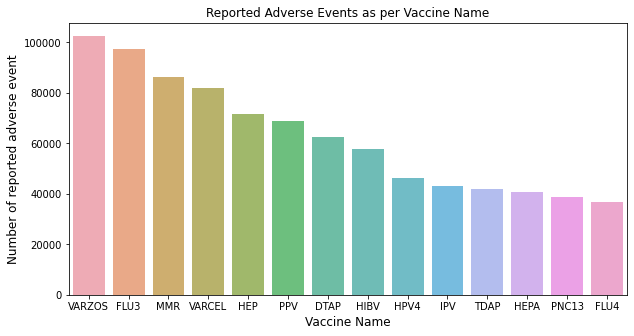

In [ ]:
vax_type  = df_vax['VAX_TYPE'].value_counts().sort_values(ascending=False)[1:15]
vax_type = pd.DataFrame(vax_type)
plt.figure(figsize=(10,5))
sns.barplot(x=vax_type.index, y=vax_type.VAX_TYPE, data=vax_type, alpha=0.8)
plt.title('Reported Adverse Events as per Vaccine Name')
plt.ylabel('Number of reported adverse event', fontsize=12)
plt.xlabel('Vaccine Name', fontsize=12)
plt.show()

In [ ]:
df_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420759 entries, 0 to 2420758
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   VAERS_ID         int64 
 1   VAX_TYPE         object
 2   VAX_MANU         object
 3   VAX_LOT          object
 4   VAX_DOSE_SERIES  object
 5   VAX_ROUTE        object
 6   VAX_SITE         object
 7   VAX_NAME         object
dtypes: int64(1), object(7)
memory usage: 147.8+ MB


### Understaing VAERS Symptoms data

In [ ]:
df_symp = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_sym.csv")

In [ ]:
df_symp.drop('Unnamed: 0',axis=1,inplace=True)
df_symp.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,25001,Agitation,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25003,Delirium,8.1,Hypokinesia,8.1,Hypotonia,8.1,NaN,NaN,NaN,NaN
2,25004,Chills,8.1,Dermatitis contact,8.1,Oedema genital,8.1,Pelvic pain,8.1,NaN,NaN
3,25005,Arthritis,8.1,Injection site oedema,8.1,Injection site reaction,8.1,NaN,NaN,NaN,NaN
4,25006,Convulsion,8.1,Dizziness,8.1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_symp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596826 entries, 0 to 2596825
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VAERS_ID         int64  
 1   SYMPTOM1         object 
 2   SYMPTOMVERSION1  float64
 3   SYMPTOM2         object 
 4   SYMPTOMVERSION2  float64
 5   SYMPTOM3         object 
 6   SYMPTOMVERSION3  float64
 7   SYMPTOM4         object 
 8   SYMPTOMVERSION4  float64
 9   SYMPTOM5         object 
 10  SYMPTOMVERSION5  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 217.9+ MB


### Understaing VAERS patient info data

In [ ]:
df_data = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_pat.csv")

In [ ]:
df_data.drop('Unnamed: 0',axis=1,inplace=True)
df_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,27274,01/02/1991,CA,1.5,NaN,NaN,F,NaN,Pt vaccinated with HIB titer developed meningi...,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,Y,11/28/1990,11/28/1990,0.0,CSF & blood culture positive for HIB,UNK,UNK,NaN,Had URI at time of injection,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,27275,01/02/1991,MN,82.0,82.0,NaN,M,12/26/1990,Pt vaccinated with FLUOGEN apparent cardiac ar...,Y,11/26/1990,NaN,NaN,NaN,NaN,NaN,NaN,N,11/26/1990,11/26/1990,0.0,NaN,OTH,OTH,"Ascriptin, Metamucil",NaN,"No allergies, murmur, parkinson's dsiease, art...",~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
2,27276,01/02/1991,GA,0.6,0.0,0.6,F,12/14/1990,Pt vaccinated with DTP/OPV developed fever 105...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,U,12/11/1990,12/11/1990,0.0,CBC normal,PVT,PVT,NaN,mild otitis media,otitis media,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
3,27277,01/02/1991,NY,37.0,37.0,NaN,F,12/05/1990,"Pt vacc. w/ Rabies developed backache, very pa...",NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,N,11/13/1990,11/14/1990,1.0,CBC-SMA-23 CPK 19 NOV; CBC- Diff seg rate SMA...,PVT,PVT,NaN,NaN,NaN,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
4,27278,01/02/1991,ME,57.0,57.0,NaN,M,12/20/1990,Pt vaccinated with Pneumococcal/FLU ZONE devel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/19/1990,12/20/1990,1.0,NaN,PVT,PVT,"Advil, Theolair",Emphysema no acute,emphysema/Rt shoulder injury/smoker,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951645 entries, 0 to 1951644
Data columns (total 35 columns):
 #   Column        Dtype  
---  ------        -----  
 0   VAERS_ID      int64  
 1   RECVDATE      object 
 2   STATE         object 
 3   AGE_YRS       float64
 4   CAGE_YR       float64
 5   CAGE_MO       float64
 6   SEX           object 
 7   RPT_DATE      object 
 8   SYMPTOM_TEXT  object 
 9   DIED          object 
 10  DATEDIED      object 
 11  L_THREAT      object 
 12  ER_VISIT      object 
 13  HOSPITAL      object 
 14  HOSPDAYS      float64
 15  X_STAY        object 
 16  DISABLE       object 
 17  RECOVD        object 
 18  VAX_DATE      object 
 19  ONSET_DATE    object 
 20  NUMDAYS       float64
 21  LAB_DATA      object 
 22  V_ADMINBY     object 
 23  V_FUNDBY      object 
 24  OTHER_MEDS    object 
 25  CUR_ILL       object 
 26  HISTORY       object 
 27  PRIOR_VAX     object 
 28  SPLTTYPE      object 
 29  FORM_VERS     int64  
 30  TODAYS_DATE   obje

### Data Exploration 

In [ ]:
print(df_data["VAERS_ID"].nunique())
print(df_symp["VAERS_ID"].nunique())
print(df_vax["VAERS_ID"].nunique())

1951645
1951386
1951644


In [ ]:
print(df_data.shape)
print(df_symp.shape)
print(df_vax.shape)

(1951645, 35)
(2596826, 11)
(2420759, 8)


## Common Functions

In [ ]:
def sanitycheck(df):
    """
    Generates Unique count, Null Count and Null Percentage for each column in Dataframe
    
    Parameters
    ---------
    Input pandas dataframe
    
    Output: pandas dataframe
    """
    data = []
    for col in df.columns:
        data.append({'Column' : col,'Unique' : len(df[col].unique()),
                'Null Count' : df[col].isnull().sum(),
                'Null Percentage' : round(df[col].isnull().sum()/df.shape[0]*100,2) })
    return pd.DataFrame(data).sort_values(['Null Percentage'],ascending=False)

In [ ]:
def binaryconvert(df,cols):
    """
    Converts categorical value with Y and N to binary 0's and 1's    
    Parameters
    ---------
    Input pandas dataframe and column names
    
    Output: pandas dataframe
    """
    for col in cols:
      df[col] = np.where(df[col] == "Y", 1, 0)


## Covid Vaccine Data Exploration

### Covid VAERS vaccine data

In [ ]:
# Filtering only COVID 19 Vaccine info
df_covid_vax = df_vax[df_vax['VAX_TYPE'] == 'COVID19']
print(df_covid_vax["VAERS_ID"].nunique())

1088560


In [ ]:
df_covid_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
1070829,902418,COVID19,PFIZER\BIONTECH,EH9899,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1070848,902440,COVID19,PFIZER\BIONTECH,EH 9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1070855,902446,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
1070874,902464,COVID19,PFIZER\BIONTECH,EH9899,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1070875,902465,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))


In [ ]:
sanitycheck(df_covid_vax)

,Column,Unique,Null Count,Null Percentage
6,VAX_SITE,12,506297,45.03
5,VAX_ROUTE,10,366336,32.58
3,VAX_LOT,42938,356102,31.67
4,VAX_DOSE_SERIES,9,2906,0.26
0,VAERS_ID,1088560,0,0.00
1,VAX_TYPE,1,0,0.00
2,VAX_MANU,4,0,0.00
7,VAX_NAME,4,0,0.00


VAX_SITE,VAX_ROUTE,VAX_LOT has significant null values

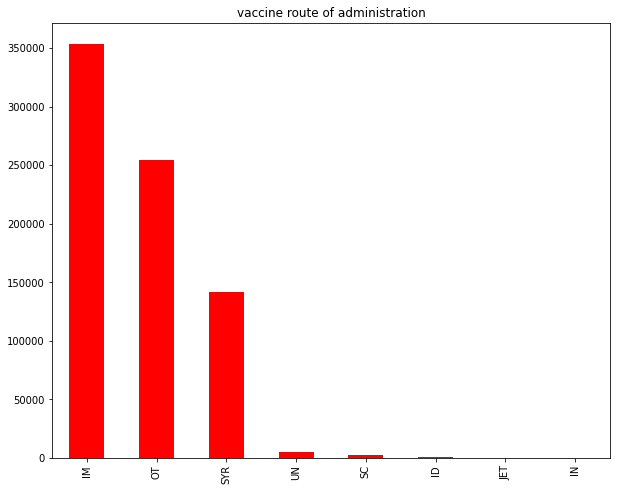

In [ ]:
plt.figure(figsize=(10,8))
route = df_covid_vax['VAX_ROUTE'].value_counts().sort_values(ascending=False)[:8]
route.plot(kind='bar', title='vaccine route of administration',color="r")

1.   IM : Intramuscular
2.   OT : Other
3.   SYR : Needle and syringe 
4.   UN  : Unknown
5.   SC  : Subcutaneous



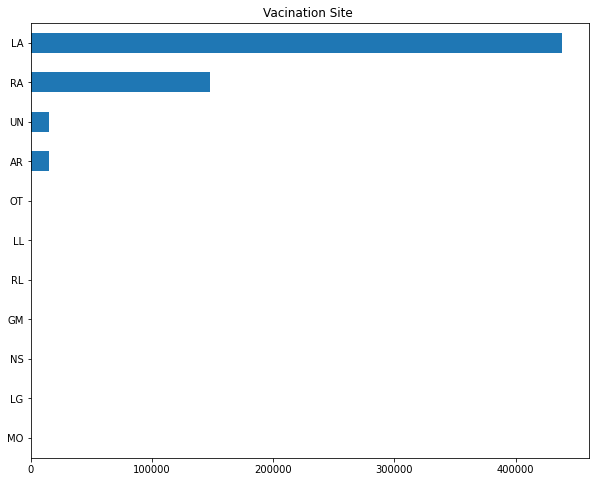

In [ ]:
plt.figure(figsize=(10,8))
site = df_covid_vax['VAX_SITE'].value_counts().sort_values(ascending=True)[-20:]
site.plot(kind='barh', title='Vacination Site ')

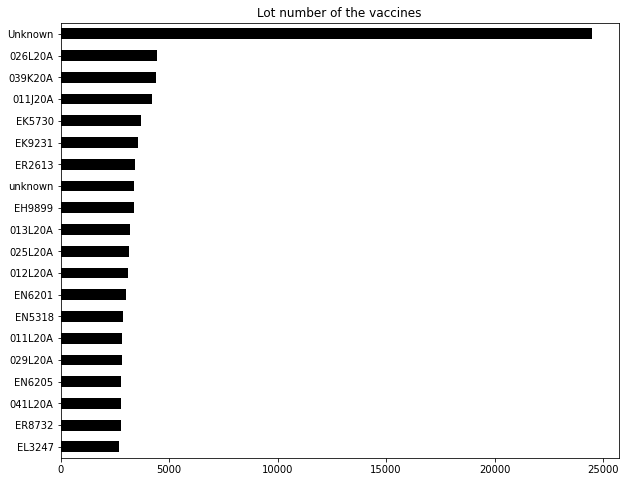

In [ ]:
plt.figure(figsize=(10,8))
lot = df_covid_vax['VAX_LOT'].value_counts().sort_values(ascending=True)[-20:]
lot.plot(kind='barh', title='Lot number of the vaccines',color="black")

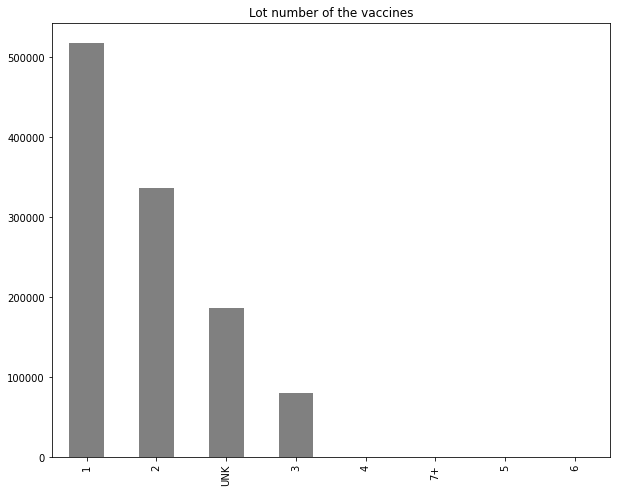

In [ ]:
plt.figure(figsize=(10,8))
lot = df_covid_vax['VAX_DOSE_SERIES'].value_counts().sort_values(ascending=False)[-20:]
lot.plot(kind='bar', title='Lot number of the vaccines',color="grey")

After Observing all the graphs above there is no signifiant information which can be used for our analysis so we will be dropping the column

In [ ]:
df_covid_vax = df_covid_vax.drop(columns =['VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE'])
df_covid_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_NAME
1070829,902418,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
1070848,902440,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
1070855,902446,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
1070874,902464,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
1070875,902465,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))


In [ ]:
df_covid_vax.drop_duplicates( keep="first", inplace=True)
df_covid_vax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090899 entries, 1070829 to 2420758
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   VAERS_ID  1090899 non-null  int64 
 1   VAX_TYPE  1090899 non-null  object
 2   VAX_MANU  1090899 non-null  object
 3   VAX_NAME  1090899 non-null  object
dtypes: int64(1), object(3)
memory usage: 41.6+ MB


In [ ]:
vax_count  = df_covid_vax['VAX_MANU'].value_counts()
vax_count = pd.DataFrame(vax_count)
vax_count['percent'] = round((vax_count['VAX_MANU'] / vax_count['VAX_MANU'].sum()) * 100,2)
vax_count

,VAX_MANU,percent
PFIZER\BIONTECH,614956,56.37
MODERNA,393933,36.11
JANSSEN,79148,7.26
UNKNOWN MANUFACTURER,2862,0.26


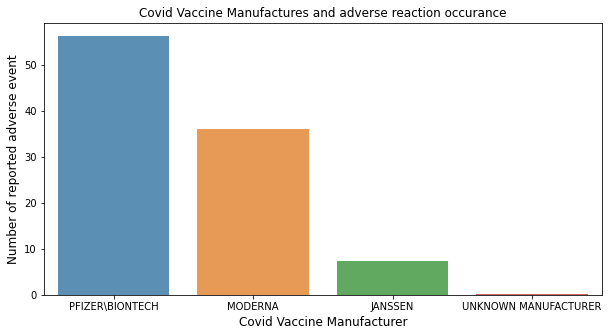

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=vax_count.index, y=vax_count.percent, data=vax_count, alpha=0.8)
plt.title('Covid Vaccine Manufactures and adverse reaction occurance')
plt.ylabel('Number of reported adverse event', fontsize=12)
plt.xlabel('Covid Vaccine Manufacturer', fontsize=12)
plt.show()

In [ ]:
g_index = df_covid_vax['VAX_MANU'].value_counts().index
g_value = df_covid_vax['VAX_MANU'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=g_index,values=g_value,textinfo = 'label + percent')])
fig.show()

As Unknown Manufacturer is as negliable so we can remove the unknown manufacturer

In [ ]:
df_covid_vax = df_covid_vax[~df_covid_vax['VAX_MANU'].isin(['UNKNOWN MANUFACTURER'])]  

In [ ]:
covid_vaersid = df_covid_vax.VAERS_ID.unique().tolist()

### Covid VAERS Patient data  

In [ ]:
# Merging Vaccine and Patient data
df_covid = df_data.merge(df_covid_vax, on="VAERS_ID",how='right')
df_covid.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME
0,902418,12/15/2020,NJ,56.0,56.0,NaN,F,NaN,Patient experienced mild numbness traveling fr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/2020,12/15/2020,0.0,none,PVT,NaN,latex,none,none,NaN,NaN,2,12/15/2020,NaN,NaN,NaN,none,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
1,902440,12/15/2020,AZ,35.0,35.0,NaN,F,NaN,C/O Headache,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/2020,12/15/2020,0.0,none,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,12/15/2020,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
2,902446,12/15/2020,WV,55.0,55.0,NaN,F,NaN,"felt warm, hot and face and ears were red and ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/2020,12/15/2020,0.0,She took Benadryl 50 mg po. No medical tests ...,OTH,NaN,"Novasc, Hydrochlorothiazide, synthroid, lisino...",none,"Hypertension, sleep apnea, hypothyroidism",NaN,NaN,2,12/15/2020,NaN,NaN,NaN,"Contrast Dye IV contrast, shellfish, strawberry",COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
3,902464,12/15/2020,LA,42.0,42.0,NaN,M,NaN,within 15 minutes progressive light-headedness...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/2020,12/15/2020,0.0,"Basic Chemistry, EKG, and vitals were all norm...",PVT,NaN,none,none,none,NaN,NaN,2,12/15/2020,NaN,NaN,Y,none,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
4,902465,12/15/2020,AR,60.0,60.0,NaN,F,NaN,Pt felt wave come over body @ 1218 starting in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/15/2020,12/15/2020,0.0,BP.,PUB,NaN,"Lisinopril, HCTZ, lipitor, amyitrypline, lexap...","Bronchitis, finished prednisone on 12-13-20","hypertension, fibromyalgia",NaN,NaN,2,12/15/2020,NaN,NaN,NaN,Biaxin,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))


In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088037 entries, 0 to 1088036
Data columns (total 38 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1088037 non-null  int64  
 1   RECVDATE      1088037 non-null  object 
 2   STATE         994109 non-null   object 
 3   AGE_YRS       818564 non-null   float64
 4   CAGE_YR       602644 non-null   float64
 5   CAGE_MO       1359 non-null     float64
 6   SEX           1088037 non-null  object 
 7   RPT_DATE      661 non-null      object 
 8   SYMPTOM_TEXT  1087719 non-null  object 
 9   DIED          23079 non-null    object 
 10  DATEDIED      18529 non-null    object 
 11  L_THREAT      26225 non-null    object 
 12  ER_VISIT      100 non-null      object 
 13  HOSPITAL      124237 non-null   object 
 14  HOSPDAYS      43895 non-null    float64
 15  X_STAY        1408 non-null     object 
 16  DISABLE       41137 non-null    object 
 17  RECOVD        1011246 non-n

In [ ]:
print(df_covid["VAERS_ID"].nunique())

1086412


In [ ]:
df_covid[df_covid.duplicated(['VAERS_ID'])]

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME
7531,912896,12/29/2020,NaN,66.0,66.0,NaN,F,NaN,patient received a dose of Moderna vaccine aft...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/21/2020,12/28/2020,7.0,NaN,WRK,NaN,unknown,NaN,NaN,NaN,NaN,2,12/29/2020,NaN,NaN,NaN,none known,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
15812,922571,01/06/2021,IN,74.0,74.0,NaN,F,NaN,At the Hospital vaccination clinic we had a pa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,01/02/2021,01/02/2021,0.0,NaN,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,01/06/2021,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
15832,922592,01/06/2021,IN,74.0,74.0,NaN,F,NaN,"On 1/2/2021, at the Hospital vaccination clini...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,01/02/2021,01/02/2021,0.0,NaN,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,01/06/2021,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
15961,922730,01/06/2021,MD,41.0,41.0,NaN,F,NaN,Employee received the Pfizer vaccine for the i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/05/2021,01/05/2021,0.0,NaN,PVT,NaN,none,NaN,NaN,NaN,NaN,2,01/06/2021,NaN,NaN,NaN,none,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
15990,922762,01/06/2021,MD,41.0,41.0,NaN,F,NaN,Employee received two different kinds of vacci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/05/2021,01/05/2021,0.0,NaN,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,01/06/2021,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086439,2067789,01/27/2022,FR,28.0,NaN,NaN,F,NaN,Maternal exposure during pregnancy; Generalise...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,06/22/2021,06/23/2021,1.0,Test Name: COVID-19 virus test; Test Result: N...,UNK,NaN,FLUTIFORM; FOLIC ACID,Pregnancy (Estimated due date: 20220504),Comments: Asthmatic Patient has not had sympt...,NaN,"GBMODERNATX, INC.MOD20224",2,01/27/2022,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
1086547,2068327,01/27/2022,FR,40.0,NaN,NaN,U,NaN,Armpit pain; This case was received via Regula...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,07/23/2021,01/19/2022,180.0,Test Name: COVID-19 virus test; Test Result: N...,UNK,NaN,LEVOTHYROXINE,NaN,NaN,NaN,"GBMODERNATX, INC.MOD20224",2,01/27/2022,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
1086618,2068415,01/27/2022,FR,74.0,NaN,NaN,F,NaN,Pneumonia; Acute pneumonia; This case was rece...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,02/06/2021,02/18/2021,12.0,Test Date: 20211224; Test Name: COVID-19 virus...,UNK,NaN,NaN,NaN,Medical History/Concurrent Conditions: Sarcoma...,NaN,"GBMODERNATX, INC.MOD20224",2,01/27/2022,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
1086974,2069639,01/27/2022,FR,21.0,NaN,NaN,F,NaN,TACHYCARDIA; DYSPNOEA; ARRHYTHMIA; FATIGUE; DI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,05/25/2021,11/03/2021,162.0,NaN,OTH,NaN,NaN,NaN,NaN,NaN,DEJNJFOC20220144868,2,01/27/2022,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))


In [ ]:
sanitycheck(df_covid)

,Column,Unique,Null Count,Null Percentage
12,ER_VISIT,2,1087937,99.99
7,RPT_DATE,183,1087376,99.94
23,V_FUNDBY,6,1087317,99.93
31,BIRTH_DEFECT,2,1087144,99.92
5,CAGE_MO,12,1086678,99.88
15,X_STAY,2,1086629,99.87
10,DATEDIED,420,1069508,98.30
9,DIED,2,1064958,97.88
11,L_THREAT,2,1061812,97.59
27,PRIOR_VAX,33156,1050888,96.59


In [ ]:
g_index = df_covid['V_ADMINBY'].value_counts().index
g_value = df_covid['V_ADMINBY'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=g_index,values=g_value,textinfo = 'label + percent')])
fig.show()

In [ ]:
df_covid.drop(['V_FUNDBY','RECVDATE','RPT_DATE','SYMPTOM_TEXT','CAGE_YR','CAGE_MO','V_ADMINBY','FORM_VERS','ER_ED_VISIT','LAB_DATA','ER_VISIT','TODAYS_DATE','SPLTTYPE','X_STAY','VAX_NAME','PRIOR_VAX','OFC_VISIT','X_STAY'],axis=1,inplace=True)

In [ ]:
df_covid.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_TYPE,VAX_MANU
0,902418,NJ,56.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/2020,12/15/2020,0.0,latex,none,none,NaN,none,COVID19,PFIZER\BIONTECH
1,902440,AZ,35.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/2020,12/15/2020,0.0,NaN,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
2,902446,WV,55.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/2020,12/15/2020,0.0,"Novasc, Hydrochlorothiazide, synthroid, lisino...",none,"Hypertension, sleep apnea, hypothyroidism",NaN,"Contrast Dye IV contrast, shellfish, strawberry",COVID19,PFIZER\BIONTECH
3,902464,LA,42.0,M,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/15/2020,12/15/2020,0.0,none,none,none,NaN,none,COVID19,PFIZER\BIONTECH
4,902465,AR,60.0,F,NaN,NaN,NaN,NaN,NaN,NaN,N,12/15/2020,12/15/2020,0.0,"Lisinopril, HCTZ, lipitor, amyitrypline, lexap...","Bronchitis, finished prednisone on 12-13-20","hypertension, fibromyalgia",NaN,Biaxin,COVID19,PFIZER\BIONTECH


In [ ]:
#Converting the Date Columns to Date Datatype
df_covid['DATEDIED'] =  pd.to_datetime(df_covid['DATEDIED'])
df_covid['VAX_DATE'] =  pd.to_datetime(df_covid['VAX_DATE'])
df_covid['ONSET_DATE'] =  pd.to_datetime(df_covid['ONSET_DATE'])


In [ ]:
# Converting SEX columns to binary
df_covid['SEX'] = df_covid['SEX'].replace('U', '2')
df_covid['SEX'] = df_covid['SEX'].replace('F', '0')
df_covid['SEX'] = df_covid['SEX'].replace('M', '1')

df_covid['RECOVD'] = df_covid['RECOVD'].fillna(0)
df_covid['RECOVD'] = df_covid['RECOVD'].replace('U', 2)
df_covid['RECOVD'] = df_covid['RECOVD'].replace('N', 0)
df_covid['RECOVD'] = df_covid['RECOVD'].replace('Y', 1)

df_covid['HOSPDAYS'] = df_covid['HOSPDAYS'].fillna(0)
df_covid.STATE = df_covid.STATE.str.upper()

In [ ]:
cols =  ['L_THREAT','DIED','HOSPITAL','DISABLE','BIRTH_DEFECT']
binaryconvert(df_covid,cols)

In [ ]:
df_covid.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_TYPE,VAX_MANU
0,902418,NJ,56.0,0,0,NaT,0,0,0.0,0,1,2020-12-15,2020-12-15,0.0,latex,none,none,0,none,COVID19,PFIZER\BIONTECH
1,902440,AZ,35.0,0,0,NaT,0,0,0.0,0,1,2020-12-15,2020-12-15,0.0,NaN,NaN,NaN,0,NaN,COVID19,PFIZER\BIONTECH
2,902446,WV,55.0,0,0,NaT,0,0,0.0,0,1,2020-12-15,2020-12-15,0.0,"Novasc, Hydrochlorothiazide, synthroid, lisino...",none,"Hypertension, sleep apnea, hypothyroidism",0,"Contrast Dye IV contrast, shellfish, strawberry",COVID19,PFIZER\BIONTECH
3,902464,LA,42.0,1,0,NaT,0,0,0.0,0,1,2020-12-15,2020-12-15,0.0,none,none,none,0,none,COVID19,PFIZER\BIONTECH
4,902465,AR,60.0,0,0,NaT,0,0,0.0,0,0,2020-12-15,2020-12-15,0.0,"Lisinopril, HCTZ, lipitor, amyitrypline, lexap...","Bronchitis, finished prednisone on 12-13-20","hypertension, fibromyalgia",0,Biaxin,COVID19,PFIZER\BIONTECH


In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088037 entries, 0 to 1088036
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   VAERS_ID      1088037 non-null  int64         
 1   STATE         994109 non-null   object        
 2   AGE_YRS       818564 non-null   float64       
 3   SEX           1088037 non-null  object        
 4   DIED          1088037 non-null  int64         
 5   DATEDIED      18529 non-null    datetime64[ns]
 6   L_THREAT      1088037 non-null  int64         
 7   HOSPITAL      1088037 non-null  int64         
 8   HOSPDAYS      1088037 non-null  float64       
 9   DISABLE       1088037 non-null  int64         
 10  RECOVD        1088037 non-null  int64         
 11  VAX_DATE      1000355 non-null  datetime64[ns]
 12  ONSET_DATE    998993 non-null   datetime64[ns]
 13  NUMDAYS       936990 non-null   float64       
 14  OTHER_MEDS    504264 non-null   object        
 15

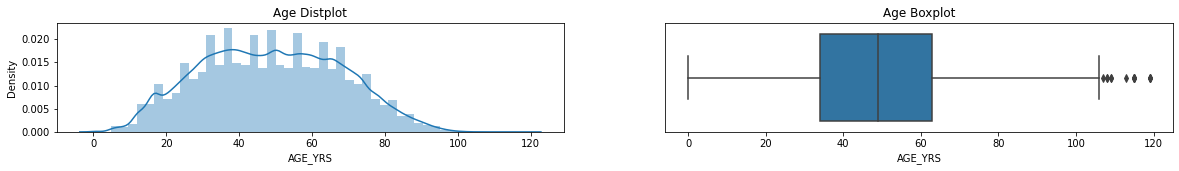

In [ ]:
from scipy.stats import probplot,skew
fig, axes = plt.subplots(1, 2, figsize=(20,2))
sns.distplot(df_covid['AGE_YRS'],kde=True, ax=axes[0])
sns.boxplot(df_covid['AGE_YRS'], ax=axes[1])
axes[1].set_yticklabels([])
axes[1].set_yticks([])
axes[0].set_title('Age Distplot')
axes[1].set_title('Age Boxplot')
plt.show()

In [ ]:
df_covid.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/covid_data.csv')

In [ ]:
df_covid = pd.read_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/covid_data.csv')

In [ ]:
df_covid.head(30)

In [ ]:
# df_covid['OTHER_MEDS'] = df_covid['OTHER_MEDS'].replace(np.nan, 0)
# df_covid['OTHER_MEDS'] = df_covid['OTHER_MEDS'].replace('none', 0)
# df_covid['OTHER_MEDS'] = df_covid['OTHER_MEDS'].replace('unknown', 0)

In [ ]:
# df_covid.head(10)

In [ ]:
# def tokenize(column):
#     """Tokenizes a Pandas dataframe column and returns a list of tokens.

#     Args:
#         column: Pandas dataframe column (i.e. df['text']).

#     Returns:
#         tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]

#     """

#     tokens = nltk.word_tokenize(column)
#     return [w for w in tokens if w.isalpha()]

In [ ]:
# !pip install nltk
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [ ]:
# df_covid['OTHER_MEDS'] = df_covid.apply(lambda x: tokenize(x['OTHER_MEDS']), axis=1)
# df_covid['OTHER_MEDS'].head()

In [ ]:
df_covid['OTHER_MEDS'] = df_covid['OTHER_MEDS'].str.lower()
df_covid = df_covid[['VAERS_ID','OTHER_MEDS']]
df_covid.drop_duplicates( keep="first", inplace=True)

In [ ]:
df_covid.head()

## Covid VAX Symptoms Cleanup

In [ ]:
df_symp 

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,25001,Agitation,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25003,Delirium,8.1,Hypokinesia,8.1,Hypotonia,8.1,NaN,NaN,NaN,NaN
2,25004,Chills,8.1,Dermatitis contact,8.1,Oedema genital,8.1,Pelvic pain,8.1,NaN,NaN
3,25005,Arthritis,8.1,Injection site oedema,8.1,Injection site reaction,8.1,NaN,NaN,NaN,NaN
4,25006,Convulsion,8.1,Dizziness,8.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2596821,2071536,Fatigue,24.1,Herpes zoster,24.1,Injection site pain,24.1,Pyrexia,24.1,SARS-CoV-2 test,24.1
2596822,2071537,COVID-19,24.1,Fatigue,24.1,SARS-CoV-2 test,24.1,NaN,NaN,NaN,NaN
2596823,2071539,Body temperature,24.1,Dysphonia,24.1,Feeling cold,24.1,Muscle spasms,24.1,Paraesthesia,24.1
2596824,2071539,Pyrexia,24.1,Seizure,24.1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_symp.drop(['SYMPTOMVERSION1','SYMPTOMVERSION2','SYMPTOMVERSION3','SYMPTOMVERSION4','SYMPTOMVERSION5'],axis=1,inplace=True)

In [ ]:
sanitycheck(df_symp)

,Column,Unique,Null Count,Null Percentage
5,SYMPTOM5,9315,1735996,66.85
4,SYMPTOM4,10010,1442418,55.55
3,SYMPTOM3,10759,1042173,40.13
2,SYMPTOM2,11464,521507,20.08
0,VAERS_ID,1951386,0,0.00
1,SYMPTOM1,11856,0,0.00


In [ ]:
df_covid_sym = df_symp[df_symp.VAERS_ID.isin(covid_vaersid)]

In [ ]:
df_covid_sym.VAERS_ID.nunique()

1086409

In [ ]:
df_covid_sym[df_covid_sym.duplicated(['VAERS_ID'])]

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
837115,902465,Sensory disturbance,Tremor,NaN,NaN,NaN
837119,902468,Dyspnoea,Feeling abnormal,Flushing,Presyncope,NaN
837148,902491,Nausea,NaN,NaN,NaN,NaN
837166,902505,Skin warm,NaN,NaN,NaN,NaN
837192,902524,Impaired driving ability,Limb discomfort,Nervousness,NaN,NaN
...,...,...,...,...,...,...
2596787,2071042,Swelling of eyelid,Throat tightness,NaN,NaN,NaN
2596799,2071477,Thrombocytosis,NaN,NaN,NaN,NaN
2596805,2071493,SARS-CoV-2 test,NaN,NaN,NaN,NaN
2596812,2071500,Electrocardiogram,Fibrin D dimer,Pericarditis,Pyrexia,NaN


In [ ]:
df_symp.duplicated(subset=['VAERS_ID']).sum ()

645440

In [ ]:
df_symp.loc[df_symp.duplicated(subset=['VAERS_ID']), :]

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
58,25071,Injection site reaction,Nausea,NaN,NaN,NaN
62,25075,Lymphadenopathy,Neck pain,Paraesthesia,NaN,NaN
70,25082,Pyrexia,Visual disturbance,NaN,NaN,NaN
140,25152,Thrombocythaemia,White blood cell disorder,NaN,NaN,NaN
174,25199,Paraesthesia,Paralysis,NaN,NaN,NaN
...,...,...,...,...,...,...
2596808,2071496,Weight decreased,NaN,NaN,NaN,NaN
2596812,2071500,Electrocardiogram,Fibrin D dimer,Pericarditis,Pyrexia,NaN
2596819,2071534,Medication error,Myalgia,Sensory disturbance,Shoulder injury related to vaccine administration,Vaccination site movement impairment
2596820,2071534,Vaccination site pain,Wrong technique in product usage process,NaN,NaN,NaN


In [ ]:
cols = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4','SYMPTOM5']
df_covid_sym["Symptoms"] = df_covid_sym[cols].apply(lambda x: ','.join(x.dropna()), axis=1)
#df_symp['Symptoms'] = df_symp['SYMPTOM1'] + "," +  df_symp['SYMPTOM2'] + "," +  df_symp['SYMPTOM3'] + "," +  df_symp['SYMPTOM4'] + "," +  df_symp['SYMPTOM5']
#https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans

In [ ]:
df_covid_sym

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,Symptoms
837073,902418,Hypoaesthesia,Injection site hypoaesthesia,NaN,NaN,NaN,"Hypoaesthesia,Injection site hypoaesthesia"
837088,902440,Headache,NaN,NaN,NaN,NaN,Headache
837094,902446,Erythema,Feeling hot,Flushing,NaN,NaN,"Erythema,Feeling hot,Flushing"
837113,902464,Dizziness,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope,"Dizziness,Electrocardiogram normal,Hyperhidros..."
837114,902465,Dysgeusia,Oral pruritus,Paraesthesia,Paraesthesia oral,Parosmia,"Dysgeusia,Oral pruritus,Paraesthesia,Paraesthe..."
...,...,...,...,...,...,...,...
2596821,2071536,Fatigue,Herpes zoster,Injection site pain,Pyrexia,SARS-CoV-2 test,"Fatigue,Herpes zoster,Injection site pain,Pyre..."
2596822,2071537,COVID-19,Fatigue,SARS-CoV-2 test,NaN,NaN,"COVID-19,Fatigue,SARS-CoV-2 test"
2596823,2071539,Body temperature,Dysphonia,Feeling cold,Muscle spasms,Paraesthesia,"Body temperature,Dysphonia,Feeling cold,Muscle..."
2596824,2071539,Pyrexia,Seizure,NaN,NaN,NaN,"Pyrexia,Seizure"


In [ ]:
df_covid_sym = df_covid_sym.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})

In [ ]:
#df_symp.head(30)

df_covid_all_sym = df_covid_sym.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()


In [ ]:
df_covid_all_sym

,VAERS_ID,Symptoms
0,902418,"Hypoaesthesia,Injection site hypoaesthesia"
1,902440,Headache
2,902446,"Erythema,Feeling hot,Flushing"
3,902464,"Dizziness,Electrocardiogram normal,Hyperhidros..."
4,902465,"Dysgeusia,Oral pruritus,Paraesthesia,Paraesthe..."
...,...,...
1086404,2071603,"COVID-19,SARS-CoV-2 test positive,Vaccine brea..."
1086405,2071604,"Expired product administered,Nasopharyngitis"
1086406,2071605,"COVID-19,Chest pain,Computerised tomogram abno..."
1086407,2071607,"Abnormal uterine bleeding,COVID-19,SARS-CoV-2 ..."


In [ ]:
df_covid_sym_id = df_covid_all_sym.assign(Symptoms=df_covid_all_sym.Symptoms.str.split(','))

In [ ]:
df_covid_sym_id

,VAERS_ID,Symptoms
0,902418,"[Hypoaesthesia, Injection site hypoaesthesia]"
1,902440,[Headache]
2,902446,"[Erythema, Feeling hot, Flushing]"
3,902464,"[Dizziness, Electrocardiogram normal, Hyperhid..."
4,902465,"[Dysgeusia, Oral pruritus, Paraesthesia, Parae..."
...,...,...
1086404,2071603,"[COVID-19, SARS-CoV-2 test positive, Vaccine b..."
1086405,2071604,"[Expired product administered, Nasopharyngitis]"
1086406,2071605,"[COVID-19, Chest pain, Computerised tomogram a..."
1086407,2071607,"[Abnormal uterine bleeding, COVID-19, SARS-CoV..."


In [ ]:
df_covid_sym1 = df_covid_sym_id.explode('Symptoms')

In [ ]:
df_covid_sym1

,VAERS_ID,Symptoms
0,902418,Hypoaesthesia
0,902418,Injection site hypoaesthesia
1,902440,Headache
2,902446,Erythema
2,902446,Feeling hot
...,...,...
1086408,2071608,Migraine
1086408,2071608,Myalgia
1086408,2071608,Nausea
1086408,2071608,SARS-CoV-2 test positive


In [ ]:
df_covid_all_sym.VAERS_ID.duplicated().sum()

0

In [ ]:
df_covid_all_sym.nunique()

VAERS_ID    1086409
Symptoms     595397
dtype: int64

In [ ]:
df_covid_all_sym[df_covid_all_sym.VAERS_ID ==902854]

,VAERS_ID,Symptoms
91,902854,"Anaphylactic reaction,Anxiety,Cough,Fatigue,Hy..."


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df_covid_all_sym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086409 entries, 0 to 1086408
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   VAERS_ID  1086409 non-null  int64 
 1   Symptoms  1086409 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.6+ MB


In [ ]:
df_covid_all_sym[df_covid_all_sym.VAERS_ID ==902854].Symptoms

91    Anaphylactic reaction,Anxiety,Cough,Fatigue,Hy...
Name: Symptoms, dtype: object

In [ ]:
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(df_covid_all_sym.Symptoms))

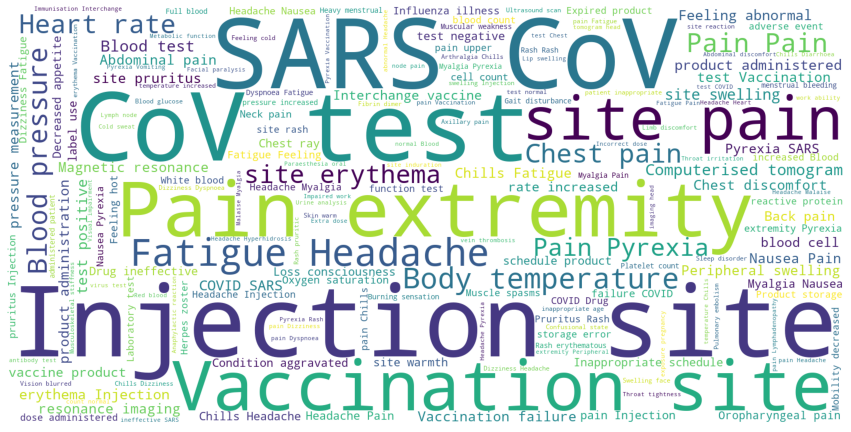

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
unique_ade = [val.strip() for sublist in df_covid_all_sym.Symptoms.dropna().str.split(",").tolist() for val in sublist]

In [ ]:
len(unique_ade)

5023001

In [ ]:
symptoms_summary = pd.DataFrame(unique_ade,columns=['symptoms']).value_counts(sort=True).reset_index().rename(columns={0:'count'})

In [ ]:
## Drop 15 covid symptoms
symptoms_summary[0:51]

,symptoms,count
0,Headache,184578
1,Fatigue,154099
2,Pyrexia,153018
3,SARS-CoV-2 test,116813
4,Chills,116467
5,Pain,111275
6,Nausea,103654
7,Dizziness,100365
8,Pain in extremity,93926
9,Myalgia,70827


In [ ]:
symptoms_summary.symptoms[0:25]

0                Headache
1                 Fatigue
2                 Pyrexia
3         SARS-CoV-2 test
4                  Chills
5                    Pain
6                  Nausea
7               Dizziness
8       Pain in extremity
9                 Myalgia
10               COVID-19
11             Arthralgia
12               Dyspnoea
13                   Rash
14               Asthenia
15               Pruritus
16                Malaise
17               Vomiting
18    Injection site pain
19             Chest pain
20       Body temperature
21           Paraesthesia
22              Diarrhoea
23        Lymphadenopathy
24          Hypoaesthesia
Name: symptoms, dtype: object

In [ ]:
top25symp = symptoms_summary.symptoms[0:25]

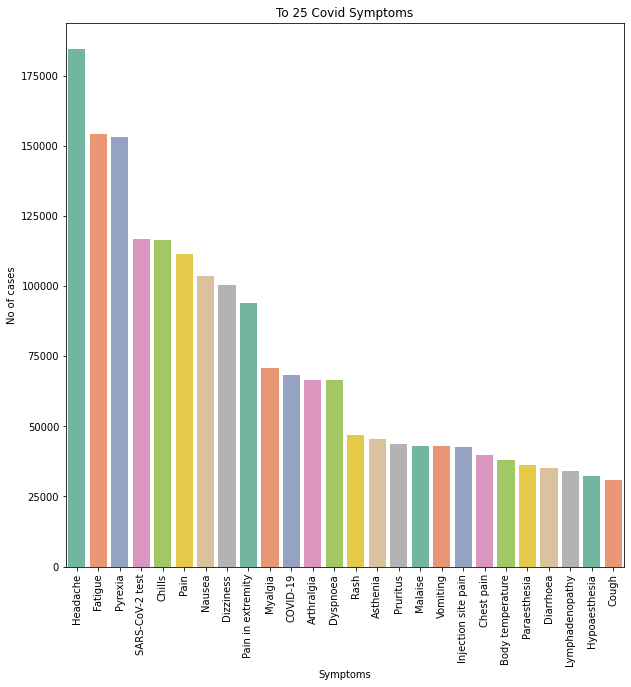

In [ ]:
plt.figure(figsize=(10,10))
chart = sns.barplot(data=symptoms_summary[0:26], x="symptoms", y="count",palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('To 25 Covid Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('No of cases')
plt.show()

Stacked visualization of symptoms from the vaccine manufactures

In [ ]:

stacked_sym_manu = pd.merge(df_covid_vax,df_covid_sym1,on='VAERS_ID',how='left')

In [ ]:
stacked_sym_manu['VAX_MANU'].value_counts()

PFIZER\BIONTECH    2998157
MODERNA            1666197
JANSSEN             363618
Name: VAX_MANU, dtype: int64

In [ ]:
stacked_sym_manu

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_NAME,Symptoms
0,902418,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Hypoaesthesia
1,902418,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Injection site hypoaesthesia
2,902440,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache
3,902446,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Erythema
4,902446,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Feeling hot
...,...,...,...,...,...
5027967,2071539,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Seizure
5027968,2071541,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Fatigue
5027969,2071541,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Malaise
5027970,2071541,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Nausea


In [ ]:
dfs = stacked_sym_manu[stacked_sym_manu.Symptoms.isin(top25symp)]

In [ ]:
pd.crosstab(dfs.Symptoms,dfs.VAX_MANU)

VAX_MANU,JANSSEN,MODERNA,PFIZER\BIONTECH
Symptoms,,,
Arthralgia,4489,23554,38391
Asthenia,3572,15339,26627
Body temperature,1897,5596,30610
COVID-19,7263,13853,47312
Chest pain,2447,10894,26558
Chills,12728,51178,52639
Diarrhoea,2418,12252,20437
Dizziness,9271,32608,58520
Dyspnoea,5086,19971,41337


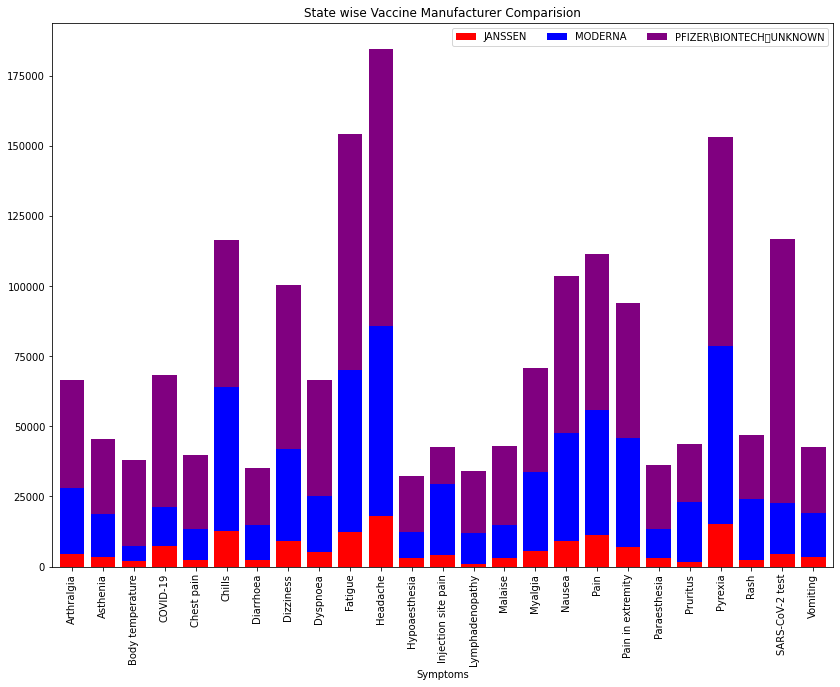

In [ ]:
pd.crosstab(dfs.Symptoms,dfs.VAX_MANU).plot.bar(stacked=True,width = .8,figsize=(14, 10),color=['red', 'blue', 'purple', 'green'])
plt.legend(['JANSSEN', 'MODERNA','PFIZER\BIONTECH	UNKNOWN','MANUFACTURER'], loc='upper right', ncol = 3)
plt.title('State wise Vaccine Manufacturer Comparision')
plt.show()